# Object Detection Using OpenCV

Object Detection is a technology of deep learning, where things, human, building, cars can be detected as object in image and videos.
* It is merely to recognize the object with bounding box in the image, where in image classification, we can simply categorize(classify) that is an object in the image or not in terms of the likelihood



### Creator : Anandan Raju

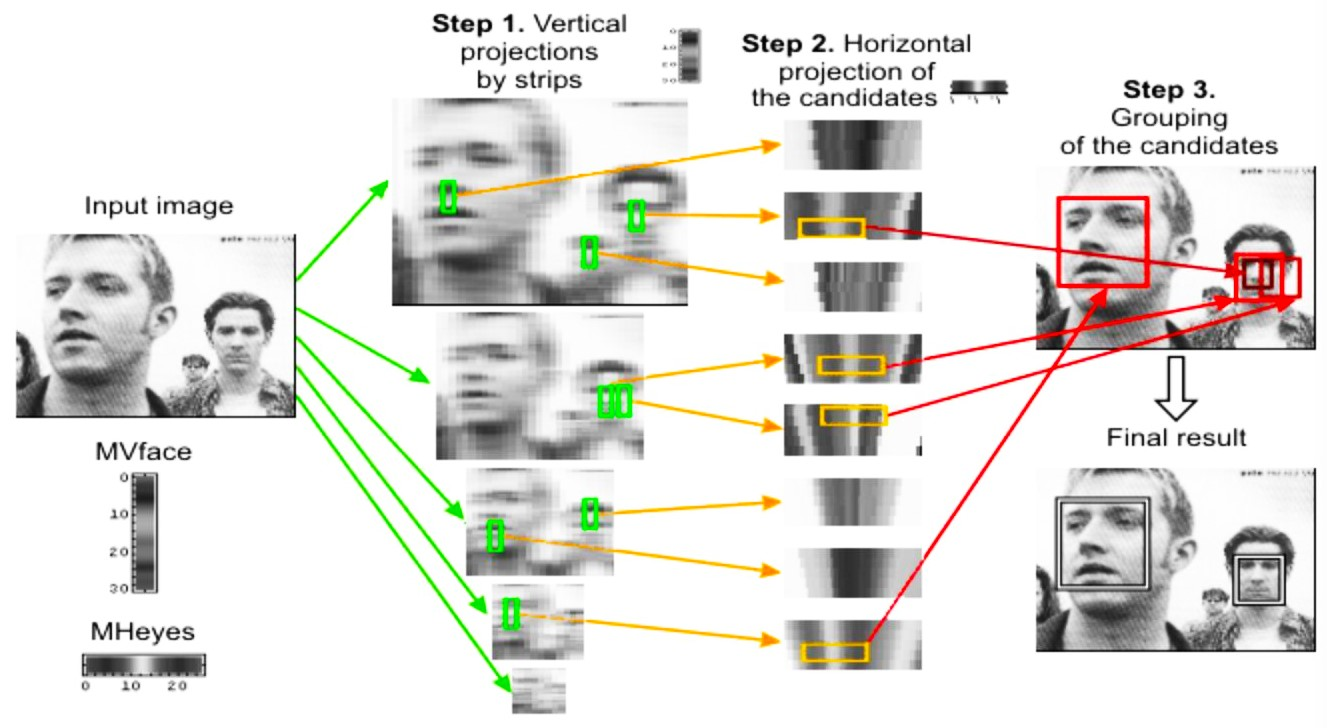

### Techniques used in this Detection

1. Template Matching
2. Corner Detection
    * Harris Corner Detection
    * Shi-Tomasi Corner Detection
3. Grid Detection
4. Edge detection
5. Contour Detection
6. Fourier Transform
7. Face Detection with OpenCV - Haar Cascade

## 1. Template Matching

Template matching is a technique for finding areas of an image that are similar to a patch (template). A patch is a small image with certain features. The goal of template matching is to find the patch/template in an image.


It is basically a method for searching and finding the location of a template image in a larger image.

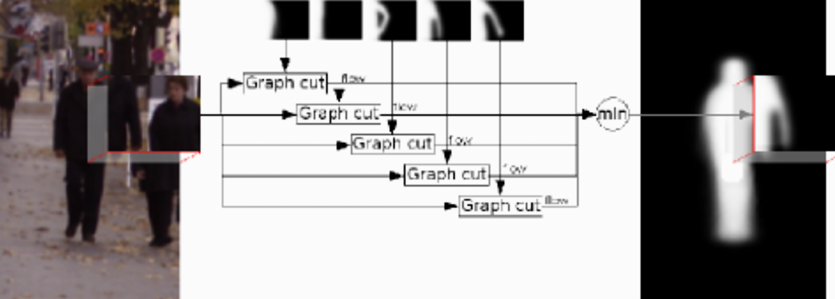

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('bearone.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

part = cv2.imread('bearoneface.jpg')
part = cv2.cvtColor(part,cv2.COLOR_BGR2RGB)

In [3]:
print(full.shape[::-1])
print(part.shape[::-1])

(3, 2000, 1295)
(3, 267, 272)


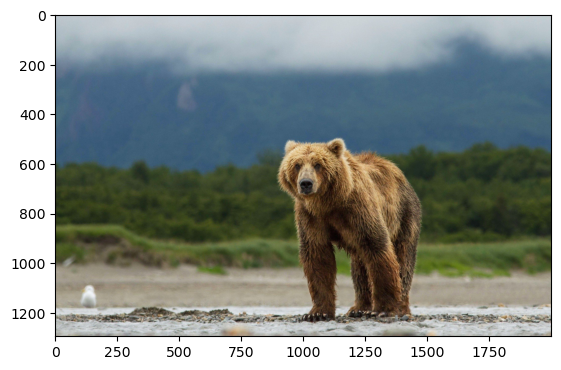

In [4]:
plt.imshow(full)

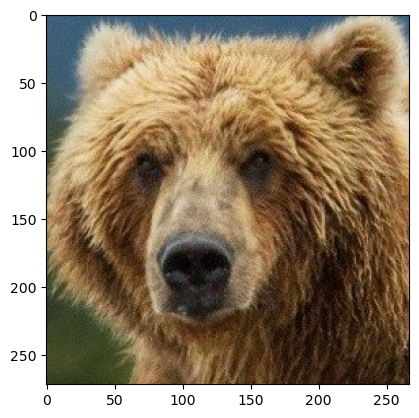

In [5]:
plt.imshow(part)

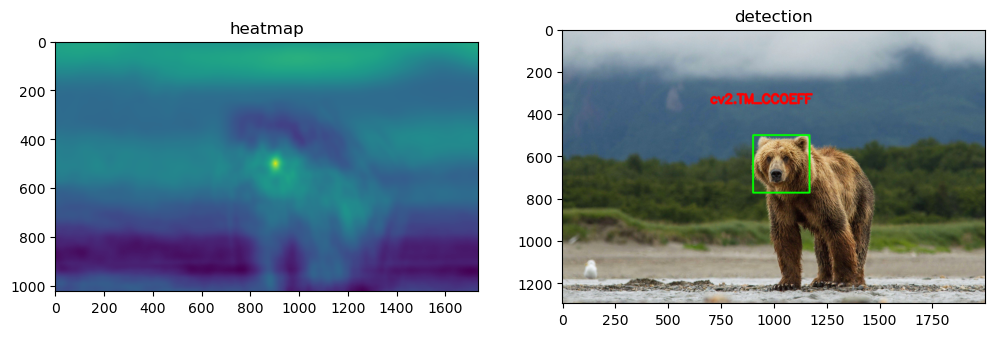

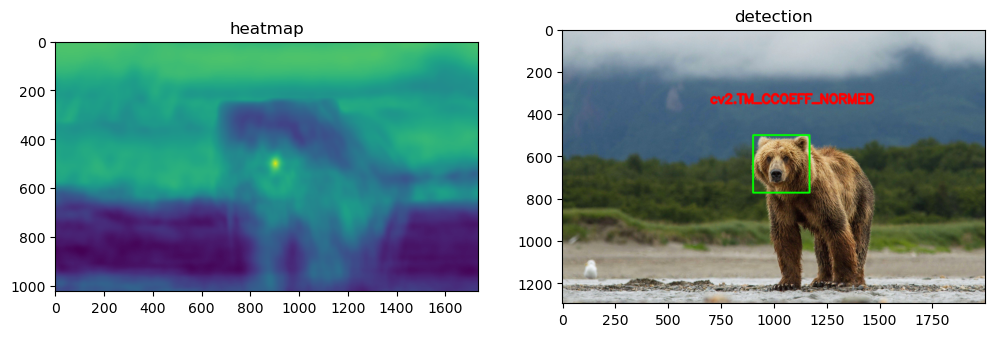

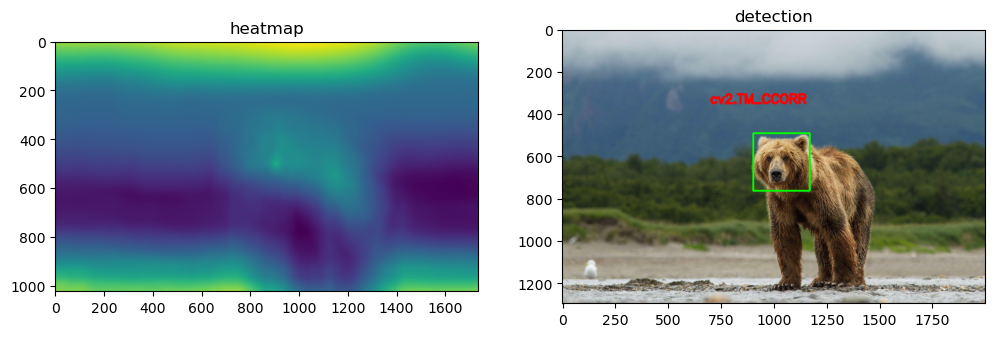

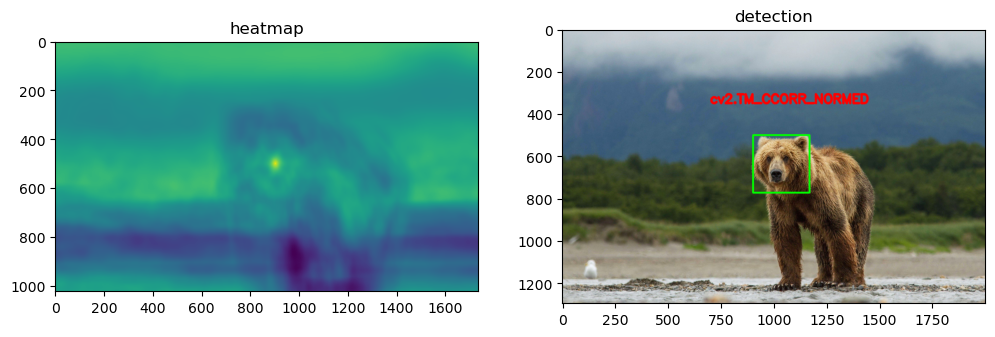

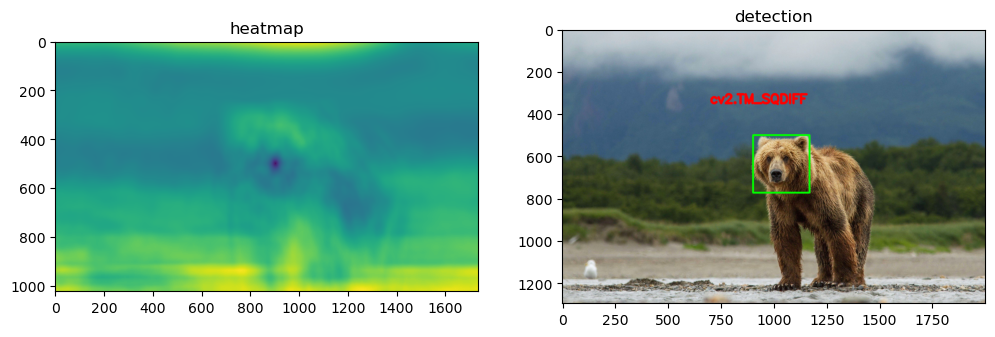

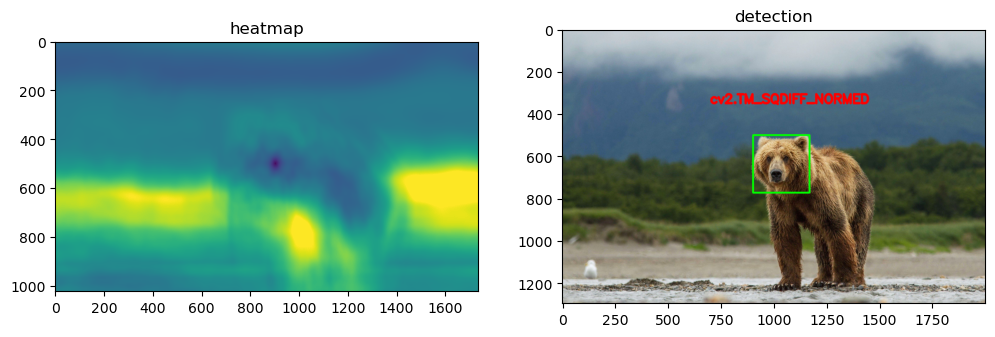

In [6]:
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

for i in methods:
    func = eval(i)
    full_img = full.copy()
    
    res = cv2.matchTemplate(part,full_img,func)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    

    if i in ['cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']:
        top_left = min_loc
        height,width,channel = part.shape
        bot_right = (top_left[0]+width,top_left[1]+height)
        
    elif i in ['cv2.TM_CCORR']:
        top_left = tuple(map(lambda i,j : i-j, min_loc,(100,282)))
        height,width,channel = part.shape
        bot_right = (top_left[0]+width,top_left[1]+height)

    else:
        top_left = max_loc
        height,width,channel = part.shape
        bot_right = (top_left[0]+width,top_left[1]+height)
        
    cv2.rectangle(full_img,top_left,bot_right,(0,255,0),8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(full_img,text=i,org = (700,350),fontFace=font,fontScale = 2,color = (255,0,0),thickness=10,lineType = cv2.LINE_AA)
    
    plt.figure(figsize=(12,10))
    plt.subplot(121)
    plt.imshow(res)
    plt.title('heatmap')
    
    plt.subplot(122)
    plt.imshow(full_img)
    plt.title('detection')
    
    plt.show()

In [7]:
full = cv2.imread('bearone.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

part = cv2.imread('bearoneface.jpg')
part = cv2.cvtColor(part,cv2.COLOR_BGR2RGB)

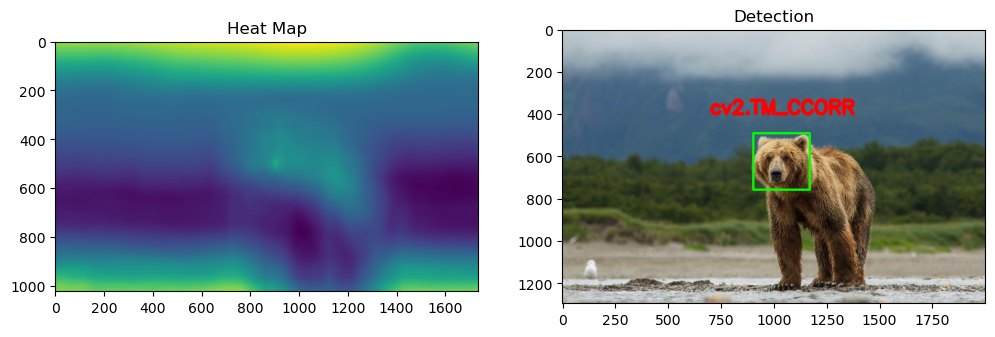

In [8]:
full_img = full.copy()

res = cv2.matchTemplate(full_img,part,cv2.TM_CCORR)
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)

top_left = tuple(map(lambda i,j : i-j, min_loc,(100,282)))
height,width,channel = part.shape
bot_right = (top_left[0]+width,top_left[1]+width)

cv2.rectangle(full_img,top_left,bot_right,(0,255,0),10)

font=cv2.FONT_ITALIC

cv2.putText(full_img,text='cv2.TM_CCORR',org=(700,400),fontFace=font,
            fontScale=3,color=(255,0,0),thickness=15,lineType=cv2.LINE_AA)

plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(res)
plt.title('Heat Map')

plt.subplot(122)
plt.imshow(full_img)
plt.title('Detection')

plt.show()

## Template Matching with Multiple Objects

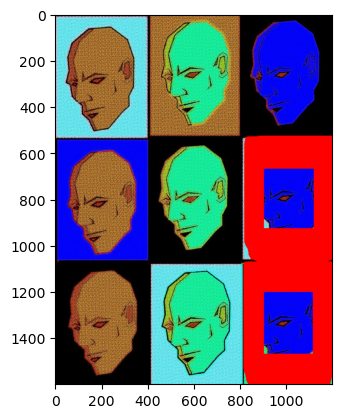

In [21]:
import numpy as np
img_rgb = cv2.imread('collage.jpg')
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
template = cv2.imread('collage1.jpg',0)

w,h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.42
loc=np.where(res>=threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb,pt,(pt[0] + w, pt[1]+h),(255,0,0),2)
    
plt.imshow(img_rgb)

In [22]:
template1 = cv2.imread('collage1.jpg')
sourcee = cv2.imread('collage.jpg')
sourcee.shape

(1600, 1200, 3)

In [23]:
template1 = cv2.resize(template1,(1200,1600))
template1.shape

(1600, 1200, 3)

In [25]:
'''multiple_img = np.concatenate((img_rgb,template1),axis=1)
sourcee = cv2.resize(sourcee,(1200,3200))
multiple_img1 = np.concatenate((multiple_img,sourcee),axis=1)

plt.figure(figsize=(12,14))
plt.imshow(multiple_img1)
plt.show()'''

'multiple_img = np.concatenate((img_rgb,template1),axis=1)\nsourcee = cv2.resize(sourcee,(1200,3200))\nmultiple_img1 = np.concatenate((multiple_img,sourcee),axis=1)\n\nplt.figure(figsize=(12,14))\nplt.imshow(multiple_img1)\nplt.show()'

## Corner Detection
### 1. Harris Corner Detection

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [28]:
ches = cv2.imread('chess.jpeg')
chess=cv2.cvtColor(ches,cv2.COLOR_BGR2RGB)

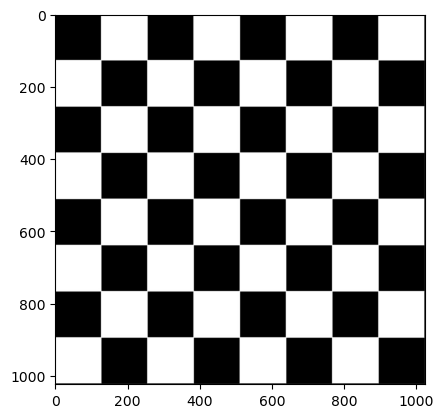

In [29]:
plt.imshow(ches)

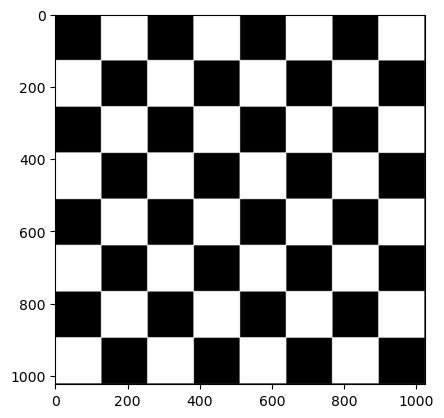

In [50]:
gray = cv2.cvtColor(ches,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')

In [34]:
gray.shape

(1024, 1024)

In [47]:
gray_img = np.float32(gray)
dst = cv2.cornerHarris(gray_img,22,23,0.24)
dst = cv2.dilate(dst,None)

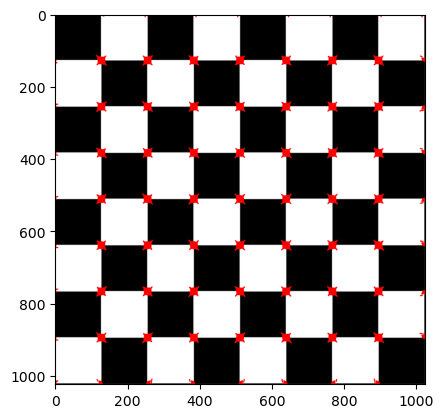

In [48]:
ches[dst>0.01*dst.max()] = [255,0,0]
plt.imshow(ches)

### 2. Shi-Tomasi Detection

In [49]:
ches = cv2.imread('chess.jpeg')
ches = cv2.cvtColor(ches,cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(ches,cv2.COLOR_RGB2GRAY)

In [53]:
corners = cv2.goodFeaturesToTrack(gray,64,0.01,10)
corners = np.int32(corners)

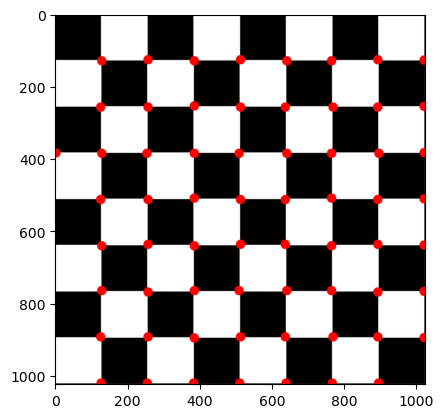

In [55]:
# Extracting the Points

for i in corners:
    x,y = i.ravel()
    cv2.circle(ches,(x,y),13,(255,0,0),-1)
    
plt.imshow(ches)